In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import functools
import scipy
import scipy.linalg as lin
from scipy.linalg import hilbert
from scipy.sparse.linalg import gmres
from scipy.sparse.linalg import bicg
from scipy.linalg import solve_triangular
from numpy.linalg import inv as inv

### Zadanie 1

In [8]:
a = np.array([[1, 1],[1, 1.0001]])
print(np.linalg.cond(a))
a_inv = np.linalg.inv(a)

b1 = np.array([[2],[2.0001]])
b2 = np.array([[2],[2]])
x1 = np.dot(a_inv,b1)
x2 = np.dot(a_inv,b2)

print(a_inv)
print(x1)
print(x2)

40002.000074915224
[[ 10001. -10000.]
 [-10000.  10000.]]
[[1.]
 [1.]]
[[2.]
 [0.]]


Duża zmiana rozwiązania przy małej zmianie wektora prawych stron.
Mała zmiana wartości współczynników może znacząco wpłynąć na wynik.

### Zadanie 2

In [9]:
H = hilbert(8)
print(H)

wierszowa = np.linalg.cond(H, np.inf)
kolumnowa = np.linalg.cond(H,1)
spektralna = np.linalg.cond(H,2)

print('Wspolczynnik uwarunkowania z normy wierszowej: ')
print(wierszowa)
print('Wspolczynnik uwarunkowania z normy wierszowej: ')
print(kolumnowa)
print('Wspolczynnik uwarunkowania z normy wierszowej: ')
print(spektralna)


[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125     ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1       ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667]]
Wspolczynnik uwarunkowania z normy wierszowej: 
33872789109.75766
Wspolczynnik uwarunkowania z normy wierszowej: 
33872789110.107353
Wspolczynnik uwarunkowania z normy wierszowej: 
15257575566.627958


Współczynniki uwarunkowania są bardzo wysokie - macierz Hilberta jest źle uwarunkowana.

### Zadanie 3

In [52]:
n = 20
t = np.transpose(np.linspace(0, 1, n))
b = np.transpose([math.cos(4*x) for x in t])
A = np.fliplr(np.vander(t, n))

#print("A:\n",A)
solvetime = []
QRtime = []
lstsqtime = []
it = 100
for i in range (0, it):
    start=time.time()
    x1=np.linalg.solve(A,b)
    end=time.time()
    solvetime.append(end-start)

    start=time.time()
    q,Ar=np.linalg.qr(A)
    x2 = solve_triangular(Ar, np.transpose(q)@b)
    end=time.time()
    QRtime.append(end-start)

    start=time.time()
    x3,_,_,_=np.linalg.lstsq(A,b,None)
    end=time.time()
    lstsqtime.append(end-start)

print("Średni czas:")
solvetimeavg = functools.reduce(lambda x,y: x+y, solvetime)/it
print("solve: ", solvetimeavg)
qrtimeavg = functools.reduce(lambda x,y: x+y, QRtime)/it
print("QR: ", qrtimeavg)
lstsqtimeavg = functools.reduce(lambda x,y: x+y, lstsqtime)/it
print("lstsq: ", lstsqtimeavg)
print("\n")

print("Residuum: ")
residuum_solve = abs(np.linalg.norm(b - A@x1))
print("solve: ", residuum_solve)
residuum_qr = abs(np.linalg.norm(b - A@x2))
print("QR: ", residuum_qr)
residuum_lstsq = abs(np.linalg.norm(b - A@x3))
print("lstsq: ", residuum_lstsq)

Średni czas:
solve:  3.6342144012451174e-05
QR:  0.00018905162811279298
lstsq:  0.00012175798416137695


Residuum: 
solve:  3.325692481969284e-15
QR:  3.5288897716431816e-15
lstsq:  1.2378022087384646e-14


### Zadanie 4

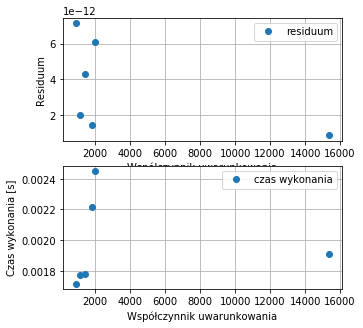

In [56]:
def macierzA(t):
    A = np.ones((500, 500))
    for i in range(0, 500):
        j = 0
        while(j < i):
            a = np.random.uniform(-1,1)
            if (abs(A[i][j]) > t):
                A[i][j]=a
                A[j][i]=a
            j += 1
    return A

b = np.ones((500,))
for i in range(0,500):
    b[i] = np.random.uniform(-1.0, 1.0)
    
tau = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
wsp_uwar = []

Solve = []
Bicg = []
Gmers = []
solvetime = []
bicgtime = []
gmerstime = []
for t in tau:
    A = macierzA(t)
    wsp_uwar.append(np.linalg.cond(A)) 
    start = time.time()
    x1 = np.linalg.solve(A,b)
    end = time.time()
    Solve.append(np.linalg.norm(b - A@x1))
    solvetime.append(end - start)
    
    Acsr = scipy.sparse.csr_matrix(A)
    start = time.time()
    x2, _ = bicg(Acsr, b)
    end = time.time()
    Bicg.append(np.linalg.norm(b - A@x2))
    bicgtime.append(end - start)
    
    start = time.time()
    x3, _ = scipy.sparse.linalg.gmres(Acsr, b)
    end = time.time()
    Gmers.append(np.linalg.norm(b - A@x3))
    gmerstime.append(end - start)

#Solve
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
plt.plot(wsp_uwar, res_solve, "o", label="residuum")   
plt.xlabel("Współczynnik uwarunkowania")
plt.ylabel("Residuum")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(wsp_uwar, solvetime, "o", label="czas wykonania")
plt.xlabel("Współczynnik uwarunkowania")
plt.ylabel("Czas wykonania [s]")
plt.legend()
plt.grid(True)mers
plt.show()



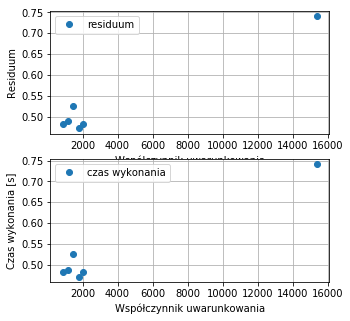

In [59]:
#Bigc
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
plt.plot(wsp_uwar, bicgtime, "o", label="residuum")   
plt.xlabel("Współczynnik uwarunkowania")
plt.ylabel("Residuum")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(wsp_uwar, bicgtime, "o", label="czas wykonania")
plt.xlabel("Współczynnik uwarunkowania")
plt.ylabel("Czas wykonania [s]")
plt.legend()
plt.grid(True)
plt.show()

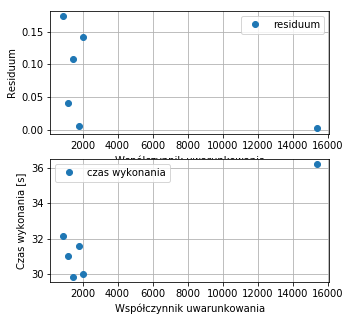

In [60]:
#Gmers
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
plt.plot(wsp_uwar, res_gmers, "o", label="residuum")   
plt.xlabel("Współczynnik uwarunkowania")
plt.ylabel("Residuum")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(wsp_uwar, czasy_gmers, "o", label="czas wykonania")
plt.xlabel("Współczynnik uwarunkowania")
plt.ylabel("Czas wykonania [s]")
plt.legend()
plt.grid(True)
plt.show()

Im wyższy współczynnik uwarunkowania macierzy, tym mniejsza jest dokładność wyznaczania rozwiązań układów równań.
Im rzadsza jest macierz, tym wyższy współczynnik uwarunkowania.


### Zadanie 5 

In [69]:
def ldu(macierz):
    L=[[0 for col in range(np.shape(macierz)[0])] for row in range(np.shape(macierz)[0])]
    D=[[0 for col in range(np.shape(macierz)[0])] for row in range(np.shape(macierz)[0])]
    U=[[0 for col in range(np.shape(macierz)[0])] for row in range(np.shape(macierz)[0])]
    for i in range (np.shape(macierz)[0]):
        for j in range (np.shape(macierz)[0]):
            if(i>j):
                L[i][j]=macierz[i][j]
            elif(i==j):
                D[i][j]=macierz[i][j]
            else:
                U[i][j]=macierz[i][j]
    return L,D,U

def gauss(macierz,b,e):
    L,D,U=ldu(macierz)
    m=np.multiply(np.matmul(lin.inv(np.add(L,D)),U),-1)
    ev=np.linalg.eigvals(m)
    for r in ev:
        r=abs(r)
    promien=np.amax(ev)
    if(promien>=1):
        print("Za duży promień spektralny")
        return -1
    x=[0]*np.shape(macierz)[0]
    x0=np.subtract(np.matmul(lin.inv(np.add(L,D)),b),np.matmul(np.matmul(lin.inv(np.add(L,D)),U),x))
    while(lin.norm(np.subtract(x0,x),1)>e):
        x=x0
        x0=np.subtract(np.matmul(lin.inv(np.add(L,D)),b),np.matmul(np.matmul(lin.inv(np.add(L,D)),U),x))
    return x0

A=[[5,-3,6],[0,2,7],[-1,2,5]]
b=[5,3,9]
gs=gauss(A,b,1e-10)
print("Gauss-Seidel:\n",gs)
print("Solve:\n",np.linalg.solve(A,b),"\n")
print("Residuum Solve: ",lin.norm(np.linalg.solve(A,b),2))
print("Residuum Gaussa-Seidela: ",lin.norm(gs,2))
print("\n")



A=[[1,2,3],[2,1,3],[3,2,1]]
b=[1,2,0]
print("Solve:\n",np.linalg.solve(A,b),"\n")
print("Gauss-Seidel:\n",gauss(A,b,1e-9),"\n")


Gauss-Seidel:
 [-18.15384615 -19.76923077   6.07692308]
Solve:
 [-18.15384615 -19.76923077   6.07692308] 

Residuum Solve:  27.51933155924132
Residuum Gaussa-Seidela:  27.51933155932906


Solve:
 [ 0.25 -0.75  0.75] 

Za duży promień spektralny
Gauss-Seidel:
 -1 

